In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
glass_df = pd.read_csv("glass.csv")
display(glass_df.head())
display(glass_df.describe())

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
X = glass_df.drop(columns='Type')
y = glass_df['Type'].ravel()
x_train, x_test, y_train, y_test = train_test_split(X ,y, test_size = 0.30, random_state = 42)

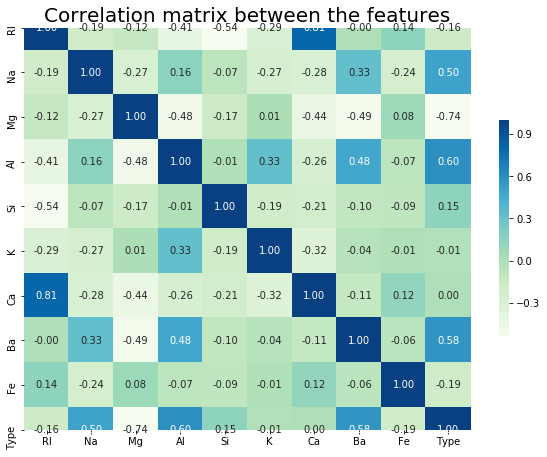

In [15]:
correlation_matrix = glass_df.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
plt.title('Correlation matrix between the features', fontsize=20)
plt.show()

## Decision Tree

In [32]:
dt_clf = DecisionTreeClassifier(random_state=50)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=50, splitter='best')

In [33]:
y_pred = dt_clf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[11,  3,  4,  0,  0,  1],
       [ 4, 11,  5,  1,  0,  2],
       [ 0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  4,  2,  0],
       [ 0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  0, 10]], dtype=int64)

In [34]:
print('precision_score: ',metrics.precision_score(y_test,y_pred,average='macro'))
print('recall_score: ',metrics.recall_score(y_test,y_pred,average='macro')) 
print('accuracy_score: ',metrics.accuracy_score(y_test,y_pred))

precision_score:  0.6401709401709402
recall_score:  0.7317569285532671
accuracy_score:  0.6461538461538462


## SVC

In [61]:
svm = SVC(kernel='linear', C=1000.0, random_state=10)
svm.fit(x_train,y_train)

SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=10,
    shrinking=True, tol=0.001, verbose=False)

In [62]:
y_pred_svm = svm.predict(x_test)

In [63]:
print('precision_score: ',metrics.precision_score(y_test,y_pred_svm,average='macro'))
print('recall_score: ',metrics.recall_score(y_test,y_pred_svm,average='macro')) 
print('accuracy_score: ',metrics.accuracy_score(y_test,y_pred_svm))

precision_score:  0.6292270531400966
recall_score:  0.6387490465293669
accuracy_score:  0.7076923076923077


## KNN

In [92]:
knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
knn.fit(x_train,y_train)

print('precision_score: ',metrics.precision_score(y_test,y_pred_knn,average='macro'))
print('recall_score: ',metrics.recall_score(y_test,y_pred_knn,average='macro')) 
print('accuracy_score: ',metrics.accuracy_score(y_test,y_pred_knn))

precision_score:  0.716374269005848
recall_score:  0.7725209763539284
accuracy_score:  0.7692307692307693


## SVM

In [91]:
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm_rbf.fit(x_train,y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [81]:
y_pred_svm_rbf = svm_rbf.predict(x_test)

In [82]:
print('precision_score: ',metrics.precision_score(y_test,y_pred_svm_rbf,average='macro'))
print('recall_score: ',metrics.recall_score(y_test,y_pred_svm_rbf,average='macro')) 
print('accuracy_score: ',metrics.accuracy_score(y_test,y_pred_svm_rbf))

precision_score:  0.5465608465608466
recall_score:  0.5599923722349351
accuracy_score:  0.676923076923077
